In [2]:
!python --version

Python 3.13.3


In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn tensorflow
        

     ---------------------------------------- 11.4/11.4 MB 9.5 MB/s eta 0:00:00
  Using cached numpy-2.0.2-cp39-cp39-win_amd64.whl (15.9 MB)
  Using cached matplotlib-3.9.4-cp39-cp39-win_amd64.whl (7.8 MB)
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached scikit_learn-1.6.1-cp39-cp39-win_amd64.whl (11.2 MB)
     -------------------------------------- 375.7/375.7 MB 3.1 MB/s eta 0:00:00
     -------------------------------------- 347.8/347.8 KB 7.3 MB/s eta 0:00:00
     -------------------------------------- 509.2/509.2 KB 6.4 MB/s eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 6.2 MB/s eta 0:00:00
     ---------------------------------------- 55.8/55.8 KB ? eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 10.8 MB/s eta 0:00:00
     -------------------------------------- 211.8/211.8 KB 6.3 MB/s eta 0:00:00
     -------------------------------------- 111.1/111.1 KB 6.7 MB/s eta 0:00:00
     -----------------------------------

You should consider upgrading via the 'C:\Users\ishwa\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip show pandas


Name: pandas
Version: 2.3.1
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: 
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License
         
         Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
         All rights reserved.
         
         Copyright (c) 2011-2023, Open source contributors.
         
         Redistribution and use in source and binary forms, with or without
         modification, are permitted provided that the following conditions are met:
         
         * Redistributions of source code must retain the above copyright notice, this
           list of conditions and the following disclaimer.
         
         * Redistributions in binary form must reproduce the above copyright notice,
           this list of conditions and the following disclaimer in the documentation
           and/or other materials provided w

In [3]:
import sys
!{sys.executable} -m pip install pandas numpy matplotlib seaborn scikit-learn tensorflow


You should consider upgrading via the 'C:\Users\ishwa\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [5]:
import pandas as pd

df = pd.read_csv("House Price Prediction Dataset.csv")  # Replace with your actual filename if different
df.head()


,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [6]:
print("df defined?" , 'df' in globals())


df defined? True


In [7]:
df.drop('Id', axis=1, inplace=True)
df.head()  # Just to confirm 'Id' is gone


,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [8]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
le = LabelEncoder()
for col in ['Location', 'Condition', 'Garage']:
    df[col] = le.fit_transform(df[col])

# Show the updated dataframe
df.head()


,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,0,0,0,149919
1,4272,5,4,3,1958,0,0,0,424998
2,3592,2,2,3,1938,0,2,0,266746
3,966,4,2,2,1902,2,1,1,244020
4,4926,1,4,2,1975,0,1,1,636056


In [9]:
# If df is already loaded, proceed with splitting the data
X = df.drop('Price', axis=1)  # Drop the target column 'Price'
y = df['Price']  # Define target variable


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=50, validation_split=0.1)


Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 363028512768.0000 - mae: 535247.5000 - val_loss: 352680247296.0000 - val_mae: 534814.3750
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 345608749056.0000 - mae: 516988.5938 - val_loss: 352664780800.0000 - val_mae: 534800.0000
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 369025351680.0000 - mae: 539236.0625 - val_loss: 352626638848.0000 - val_mae: 534764.4375
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 363349213184.0000 - mae: 535631.3125 - val_loss: 352550191104.0000 - val_mae: 534693.1250
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 347355611136.0000 - mae: 520892.9375 - val_loss: 352417742848.0000 - val_mae: 534569.6250
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 364194267136.0000 - mae: 535058.9375 - val_loss: 352210321408.0000 - val_mae: 534375.8125
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 357803687936.0000 - mae: 530517.4375 - val_loss: 3519

In [21]:
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError

# Load model WITHOUT compiling
model = load_model("house_price_model.h5", compile=False)

# Now compile with explicit loss function
model.compile(optimizer='adam', loss=MeanSquaredError(), metrics=['mae'])


In [22]:
model.save("house_price_model.h5")


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


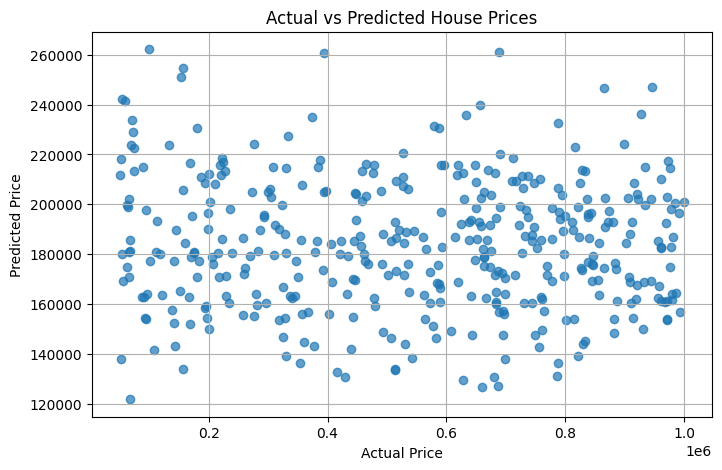

In [23]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()
